In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, SVR
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [34]:
df_titanic = sns.load_dataset('titanic')
df_titanic = df_titanic.dropna(subset=['age', 'embarked'])  
df_titanic['sex'] = LabelEncoder().fit_transform(df_titanic['sex'])  
df_titanic = pd.get_dummies(df_titanic, columns=['embarked'], drop_first=True)  
X_titanic = df_titanic[['sex', 'age', 'fare', 'pclass', 'embarked_Q', 'embarked_S']]
y_titanic = df_titanic['survived']

In [35]:
df_boston = pd.read_csv("Boston_with_null_values.csv")
df_boston.fillna(df_boston.mean(), inplace=True)  
X_boston = df_boston.drop('MEDV', axis=1)  
y_boston = df_boston['MEDV'] 

In [36]:
breast_cancer = load_breast_cancer()
df_breast_cancer = pd.DataFrame(data=breast_cancer.data, columns=breast_cancer.feature_names)
df_breast_cancer['target'] = breast_cancer.target
X_breast_cancer = df_breast_cancer.drop('target', axis=1)
y_breast_cancer = df_breast_cancer['target']

In [37]:
iris = load_iris()
df_iris = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df_iris['target'] = iris.target
X_iris = df_iris.drop('target', axis=1)
y_iris = df_iris['target']

In [38]:
def plot_decision_boundaries(X, y, model, ax, title):
    X = X[['sepal length (cm)', 'sepal width (cm)']].values
    model.fit(X, y)
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette='coolwarm', s=30, edgecolor='k', ax=ax)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length (cm)')
    ax.set_ylabel('Sepal width (cm)')
    ax.set_title(title)

In [ ]:
def evaluate_svm_model(X, y, model, kernel_name, is_classification=True):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    
    if is_classification:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
        plt.title(f'Confusion Matrix for SVM with {kernel_name}')
        plt.show()
    else:  
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = np.sqrt(((y_pred - y_test) ** 2).mean())  
        print(f"RMSE of SVR with {kernel_name}: {accuracy:.2f}")
    return accuracy

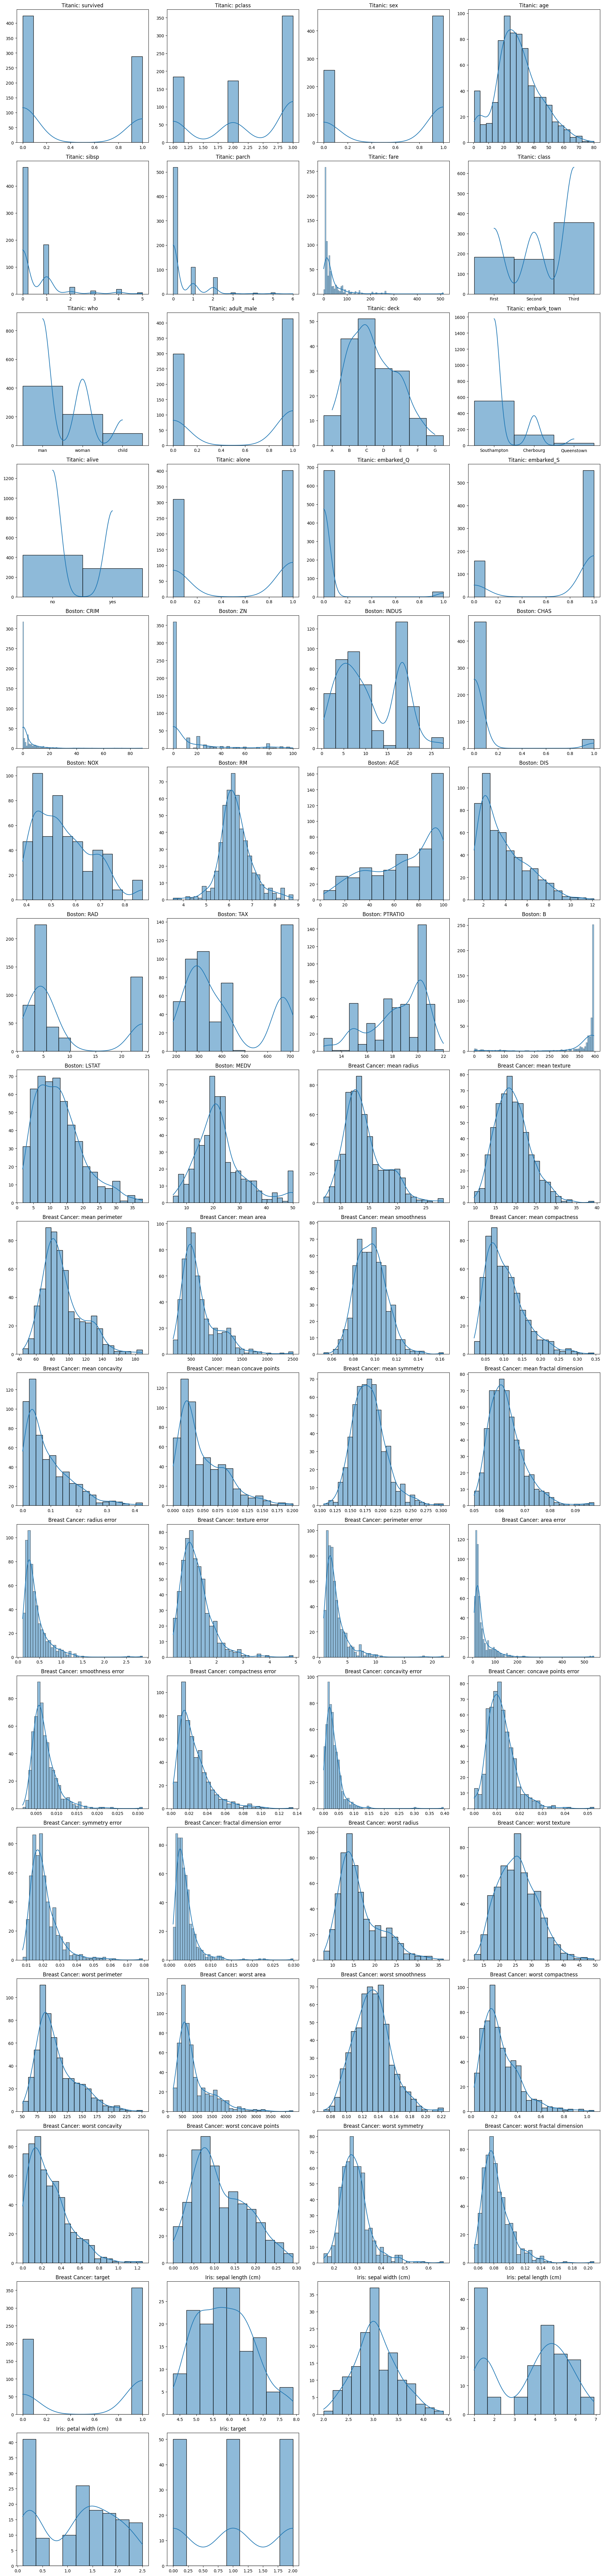

In [48]:
def plot_subplots_for_datasets(datasets, dataset_names):
 
    total_columns = sum([df.shape[1] for df in datasets])
    
   
    n_rows = (total_columns // 4) + (total_columns % 4 > 0) 
    fig, axs = plt.subplots(n_rows, 4, figsize=(20, n_rows * 5))  
    
   
    axs = axs.flatten()
    
    ax_idx = 0
    for i, (df, name) in enumerate(zip(datasets, dataset_names)):
        for column in df.columns:
            if ax_idx < len(axs):  
                ax = axs[ax_idx]
                sns.histplot(df[column], kde=True, ax=ax)
                ax.set_title(f'{name}: {column}')
                ax.set_xlabel('')
                ax.set_ylabel('')
                ax_idx += 1
    
  
    for j in range(ax_idx, len(axs)):
        axs[j].axis('off')

    plt.tight_layout()
    plt.show()


datasets = [df_titanic, df_boston, df_breast_cancer, df_iris]
dataset_names = ['Titanic', 'Boston', 'Breast Cancer', 'Iris']


plot_subplots_for_datasets(datasets, dataset_names)


Evaluating SVM models for Titanic dataset:


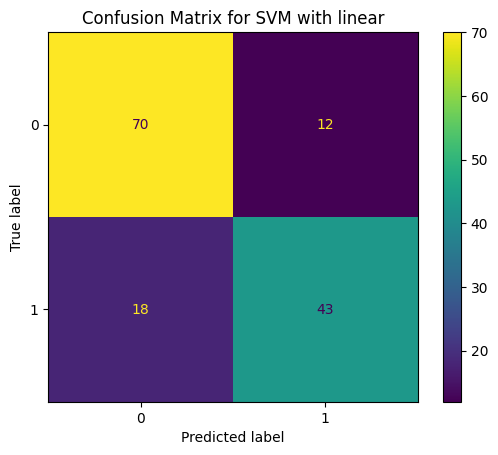

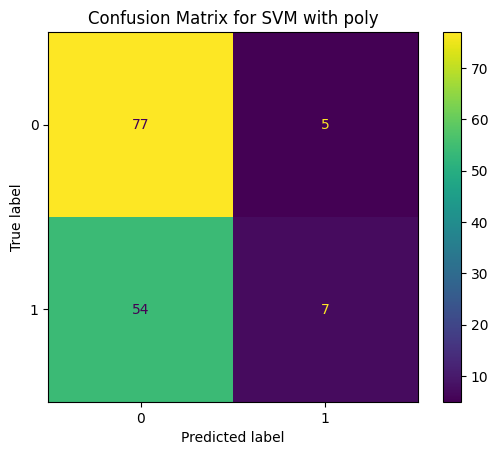

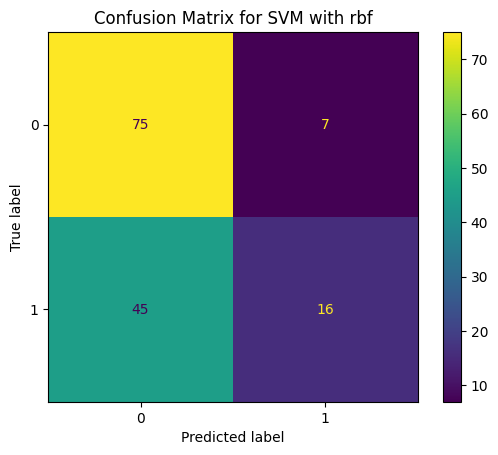


Evaluating SVM models for Boston dataset:
RMSE of SVR with linear: 6.39
RMSE of SVR with poly: 8.80
RMSE of SVR with rbf: 8.86

Evaluating SVM models for Breast Cancer dataset:


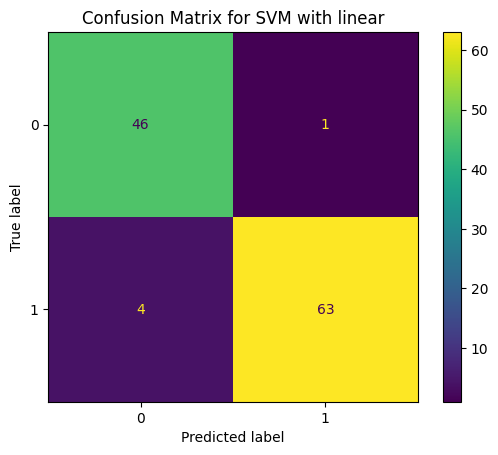

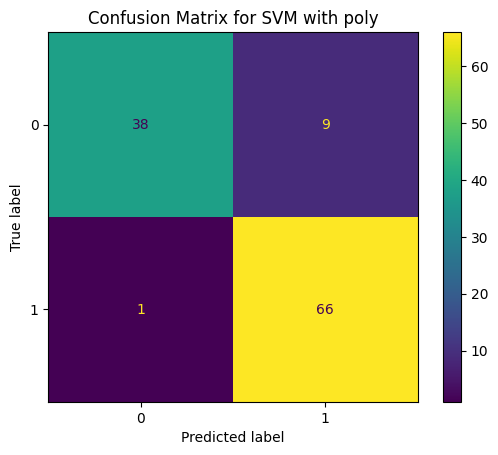

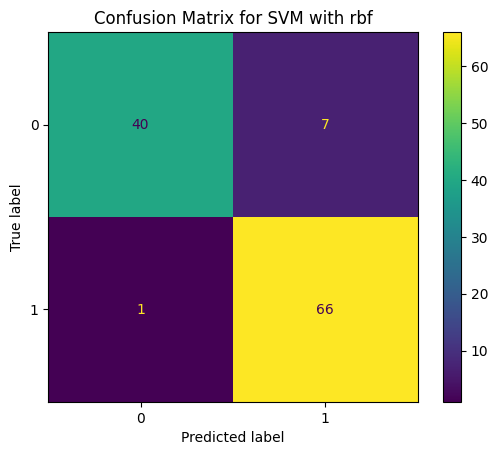


Evaluating SVM models for Iris dataset:


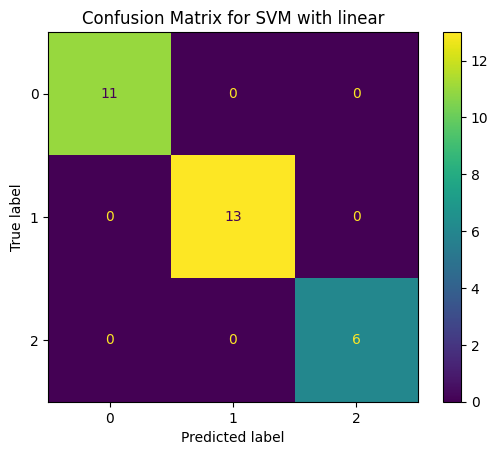

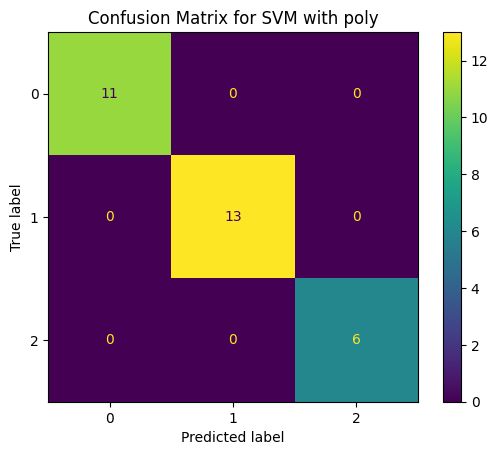

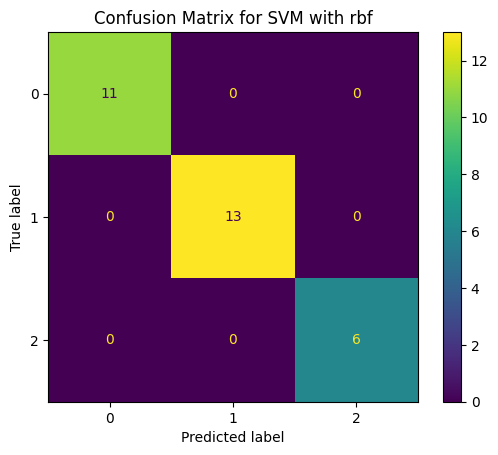

In [ ]:
kernels = ['linear', 'poly', 'rbf']
dataset_accuracies = {'Titanic': [], 'Boston': [], 'Breast Cancer': [], 'Iris': []}

for dataset, (X, y, is_classification) in zip(
    ['Titanic', 'Boston', 'Breast Cancer', 'Iris'],
    [
        (X_titanic, y_titanic, True),
        (X_boston, y_boston, False), 
        (X_breast_cancer, y_breast_cancer, True),
        (X_iris, y_iris, True),
    ]
):
    print(f"\nEvaluating SVM models for {dataset} dataset:")
    for kernel in kernels:
        if dataset == 'Boston':  
            svm_model = SVR(kernel=kernel)
        else:  
            svm_model = SVC(kernel=kernel, random_state=0)
        
        accuracy = evaluate_svm_model(X, y, svm_model, kernel, is_classification)
        dataset_accuracies[dataset].append(accuracy)

In [ ]:
print("\nAccuracies of all models:")
for dataset, accuracies in dataset_accuracies.items():
    print(f"{dataset} dataset:")
    for kernel, accuracy in zip(kernels, accuracies):
        if dataset == "Boston":  
            print(f"  {kernel.capitalize()} kernel: RMSE = {accuracy:.2f}")
        else:  
            print(f"  {kernel.capitalize()} kernel: Accuracy = {accuracy:.2f}")


Accuracies of all models:
Titanic dataset:
  Linear kernel: Accuracy = 0.79
  Poly kernel: Accuracy = 0.59
  Rbf kernel: Accuracy = 0.64
Boston dataset:
  Linear kernel: RMSE = 6.39
  Poly kernel: RMSE = 8.80
  Rbf kernel: RMSE = 8.86
Breast Cancer dataset:
  Linear kernel: Accuracy = 0.96
  Poly kernel: Accuracy = 0.91
  Rbf kernel: Accuracy = 0.93
Iris dataset:
  Linear kernel: Accuracy = 1.00
  Poly kernel: Accuracy = 1.00
  Rbf kernel: Accuracy = 1.00


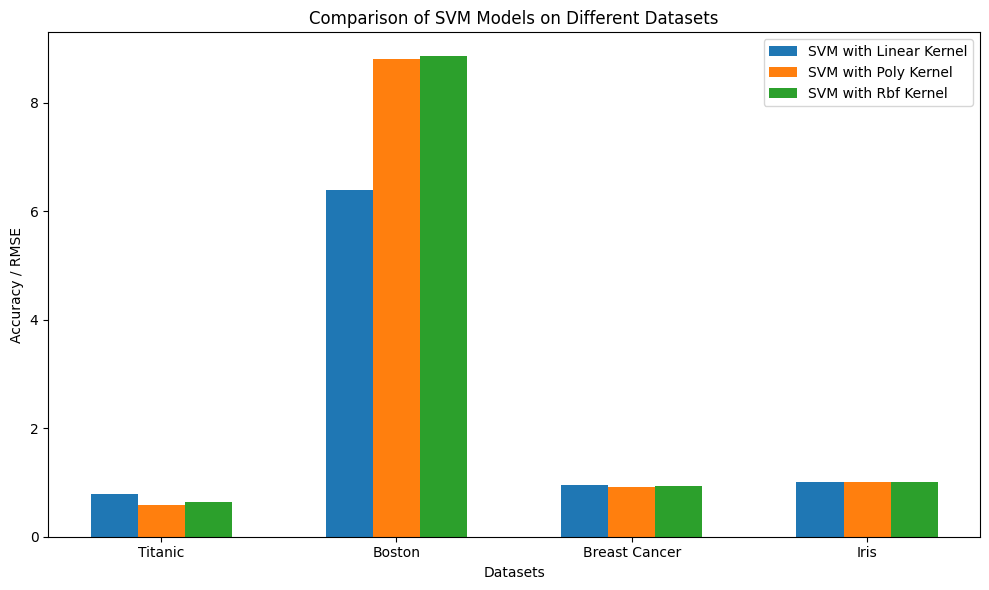

In [ ]:
dataset_names = list(dataset_accuracies.keys())
accuracies = np.array(list(dataset_accuracies.values()))

fig, ax = plt.subplots(figsize=(10, 6))
width = 0.2  
x = np.arange(len(dataset_names))

for i, kernel in enumerate(kernels):
    ax.bar(x + i*width, accuracies[:, i], width=width, label=f'SVM with {kernel.capitalize()} Kernel')

ax.set_xlabel('Datasets')
ax.set_ylabel('Accuracy / RMSE')
ax.set_title('Comparison of SVM Models on Different Datasets')
ax.set_xticks(x + width)
ax.set_xticklabels(dataset_names)
ax.legend()
plt.tight_layout()
plt.show()